In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import nltk

df = pd.read_csv('/content/reviews.csv')
df.head(361)

,Text,Date,Stars
0,My 30% discount code didn’t get applied and I ...,6 hours ago,1
1,Always quick and easy. Wish the styles didn't ...,6 hours ago,5
2,"With my original order, I selected the 2-day s...",9 hours ago,1
3,"I love this website & app , not only do you gu...",10 hours ago,5
4,Tariffs and duties were really high compared t...,14 hours ago,4
...,...,...,...
356,I'm upset! I received an email from you statin...,10-Apr-25,1
357,Great items and deals first time shopper can't...,10-Apr-25,5
358,I been done put in my birthday and still didn’...,10-Apr-25,1
359,I've been doing 1 day shipping paying the extr...,10-Apr-25,3


In [ ]:
import spacy
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
def process_text_mixed(text):
    doc = nlp(text.lower())


    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]


    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]


    stemmed = [stemmer.stem(token) for token in tokens]

    return tokens, lemmatized, stemmed


df['tokens'], df['lemmatized'], df['stemmed'] = zip(*df['Text'].astype(str).apply(process_text_mixed))

cleaned_reviews = df['lemmatized'].apply(lambda x: ' '.join(x)).tolist()

df[['Text', 'tokens', 'lemmatized', 'stemmed']].head(2)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Text,tokens,lemmatized,stemmed
0,My 30% discount code didn’t get applied and I ...,"[30, discount, code, applied, typed, sent, ema...","[30, discount, code, apply, type, send, email,...","[30, discount, code, appli, type, sent, email,..."
1,Always quick and easy. Wish the styles didn't ...,"[quick, easy, wish, styles, sell, fast, restoc...","[quick, easy, wish, style, sell, fast, restock...","[quick, easi, wish, style, sell, fast, restock..."


In [ ]:

def get_pos_tags(text):
    doc = nlp(text.lower())
    return [(token.text, token.pos_) for token in doc if not token.is_punct]


df['pos_tags'] = df['Text'].astype(str).apply(get_pos_tags)


df[['Text', 'pos_tags']].head(2)


,Text,pos_tags
0,My 30% discount code didn’t get applied and I ...,"[(my, PRON), (30, NUM), (discount, NOUN), (cod..."
1,Always quick and easy. Wish the styles didn't ...,"[(always, ADV), (quick, ADJ), (and, CCONJ), (e..."


,Text,cleaned_review,lexicon_sentiment
0,My 30% discount code didn’t get applied and I ...,30 discount code apply type send email want di...,NEUTRAL
1,Always quick and easy. Wish the styles didn't ...,quick easy wish style sell fast restock quick ...,POSITIVE
2,"With my original order, I selected the 2-day s...",original order select 2 day shipping method ch...,NEUTRAL
3,"I love this website & app , not only do you gu...",love website app guy late fashion amazing disc...,POSITIVE
4,Tariffs and duties were really high compared t...,tariff duty high compare shop online,NEUTRAL
5,It wouldn’t take my card,card,NEUTRAL
6,"I ordered 8. Of April , the order even not lef...",order 8 april order leave usa uk currently try...,NEGATIVE
7,Free 1day shipping was advertised but not avai...,free 1day shipping advertise available,NEUTRAL
8,I received my package just in time for my vaca...,receive package time vacation,NEUTRAL
9,Am here waiting for my delivery which was due ...,wait delivery today status evri stick expect o...,NEGATIVE


<ipython-input-15-5564fff63250>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


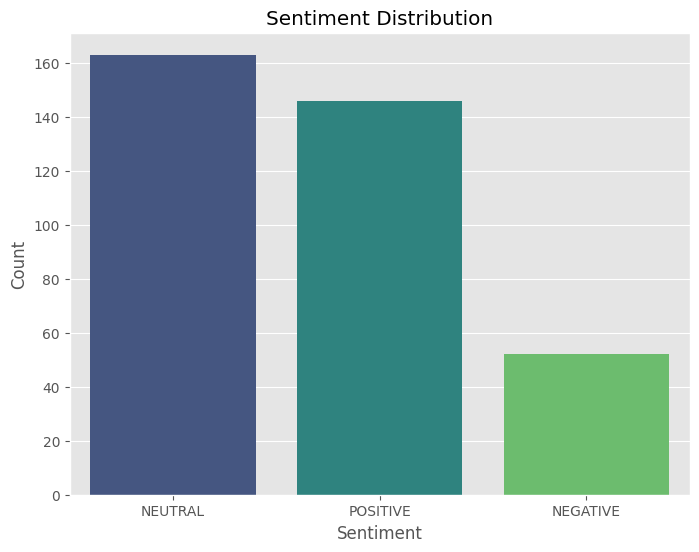

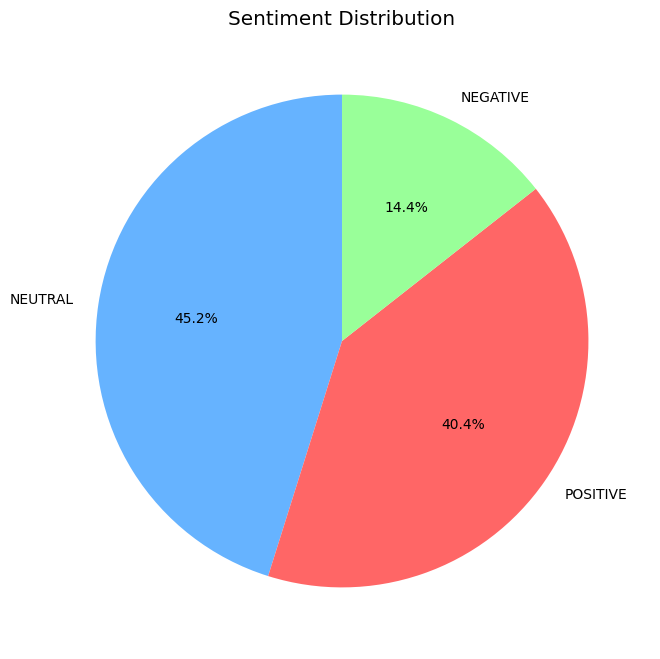

In [ ]:

positive_words = set([
    "good", "great", "excellent", "amazing", "love", "wonderful", "fantastic", "best", "awesome", "fast" ,"easy" , "quick"
])

negative_words = set([
    "bad", "terrible", "awful", "horrible", "worst", "hate", "disgusting", "slow", "cold", "dirty", "rude" , "disappointed", "disappointing" , "frustrated"
,"refund" , "expensive" , "delay" , "unfair" , "bad", "unacceptable"])


def lexicon_sentiment_analysis(text):
    tokens = text.split()
    pos = sum(1 for word in tokens if word in positive_words)
    neg = sum(1 for word in tokens if word in negative_words)
    if pos > neg:
        return "POSITIVE"
    elif neg > pos:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

lexicon_results = [lexicon_sentiment_analysis(review) for review in cleaned_reviews]

df['cleaned_review'] = cleaned_reviews

df['lexicon_sentiment'] = lexicon_results
display(df[['Text', 'cleaned_review', 'lexicon_sentiment']].head(20))


sentiment_counts = df['lexicon_sentiment'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff6666', '#99ff99'], startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,VaderSentiment
0,My 30% discount code didn’t get applied and I ...,Neutral
1,Always quick and easy. Wish the styles didn't ...,Positive
2,"With my original order, I selected the 2-day s...",Neutral
3,"I love this website & app , not only do you gu...",Positive
4,Tariffs and duties were really high compared t...,Neutral
5,It wouldn’t take my card,Neutral
6,"I ordered 8. Of April , the order even not lef...",Negative
7,Free 1day shipping was advertised but not avai...,Positive
8,I received my package just in time for my vaca...,Neutral
9,Am here waiting for my delivery which was due ...,Negative


<ipython-input-13-1c9ab4ed0290>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_sentiment_counts.index, y=vader_sentiment_counts.values, palette='viridis')


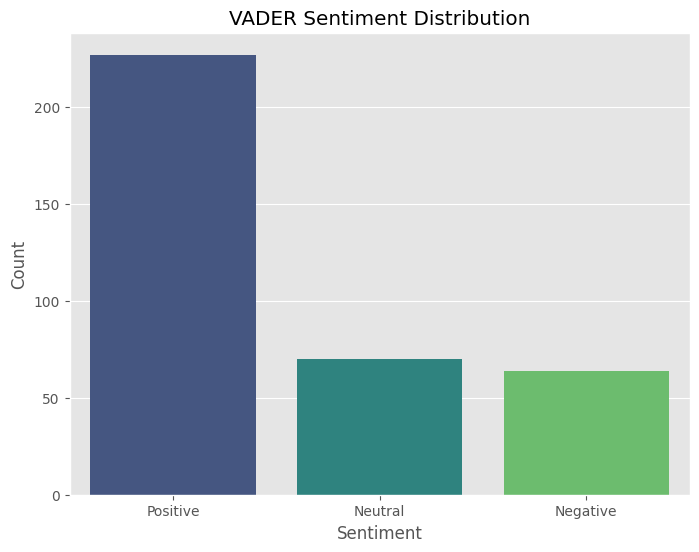

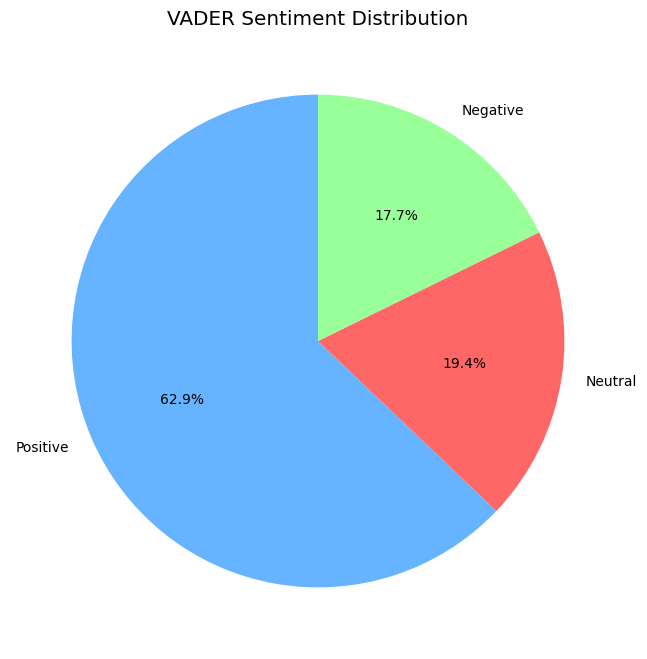

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


vad = SentimentIntensityAnalyzer()


vad.lexicon.update({
    'terrible': -4.0,
    'horrible': -3.5,
    'awful': -3.0,
    'disappointed': -3.0,
    'frustrated': -4.5,
    'refund': -4.0
})


def vader_sentiment(text):

    score = vad.polarity_scores(text)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']


    if pos > 0.2 and pos > neg:
        return "Positive"
    elif neg > 0.2 and neg > pos:
        return "Negative"
    else:
        return "Neutral"
df['cleaned_review'] = cleaned_reviews

df['VaderSentiment'] = df['cleaned_review'].apply(vader_sentiment)


display(df[['Text', 'VaderSentiment']].head(20))

vader_sentiment_counts = df['VaderSentiment'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=vader_sentiment_counts.index, y=vader_sentiment_counts.values, palette='viridis')

plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 8))
vader_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff6666', '#99ff99'], startangle=90)
plt.title('VADER Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
!pip install transformers


In [ ]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cud

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from IPython.display import display


df = pd.read_csv('/content/reviews.csv')

df['clean_text'] = df['Text'].apply(lambda x: str(x).strip().lower())


tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    rating = torch.argmax(probs) + 1
    confidence = torch.max(probs).item()
    sentiment = label_sentiment(rating)
    return rating.item(), sentiment, confidence

df['sentiment_rating'], df['sentiment_label'], df['confidence'] = zip(*df['clean_text'].map(predict_sentiment))


display(df[['Text', 'sentiment_rating', 'sentiment_label', 'confidence']].head(100))




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

,Text,sentiment_rating,sentiment_label,confidence
0,My 30% discount code didn’t get applied and I ...,1,negative,0.713577
1,Always quick and easy. Wish the styles didn't ...,4,positive,0.549597
2,"With my original order, I selected the 2-day s...",1,negative,0.415261
3,"I love this website & app , not only do you gu...",5,positive,0.953513
4,Tariffs and duties were really high compared t...,3,neutral,0.297116
...,...,...,...,...
95,I love the clothes everything fits and the qua...,5,positive,0.812170
96,Free One Day shipping did not work as advertis...,1,negative,0.771757
97,They added a last minute item I didn't approve!,2,negative,0.425193
98,I paid for next day delivery and it came 3 day...,1,negative,0.734282


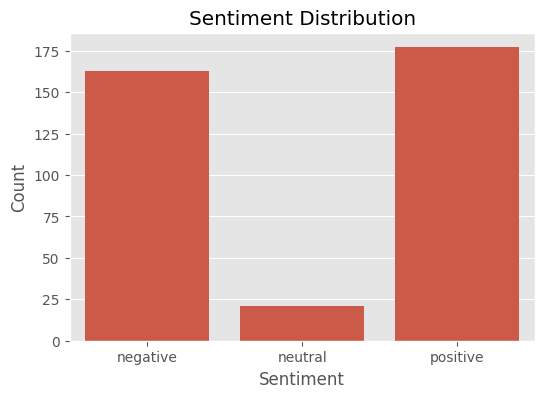

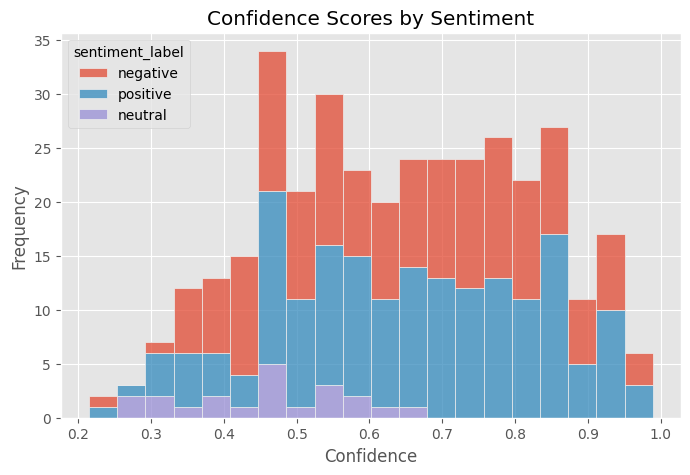

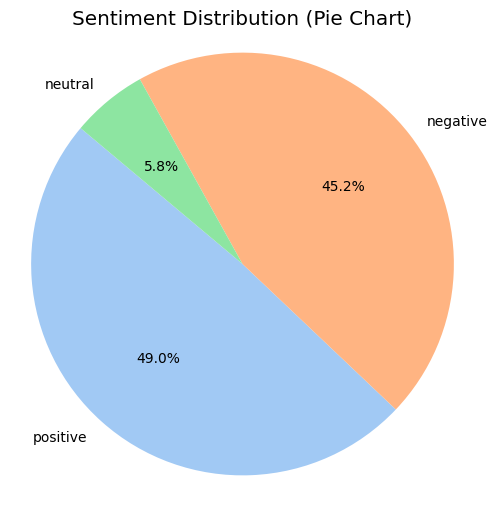

In [ ]:
plt.style.use('ggplot')


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(data=df, x='confidence', hue='sentiment_label', multiple='stack', bins=20)
plt.title('Confidence Scores by Sentiment')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()


sentiment_counts = df['sentiment_label'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'))

plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


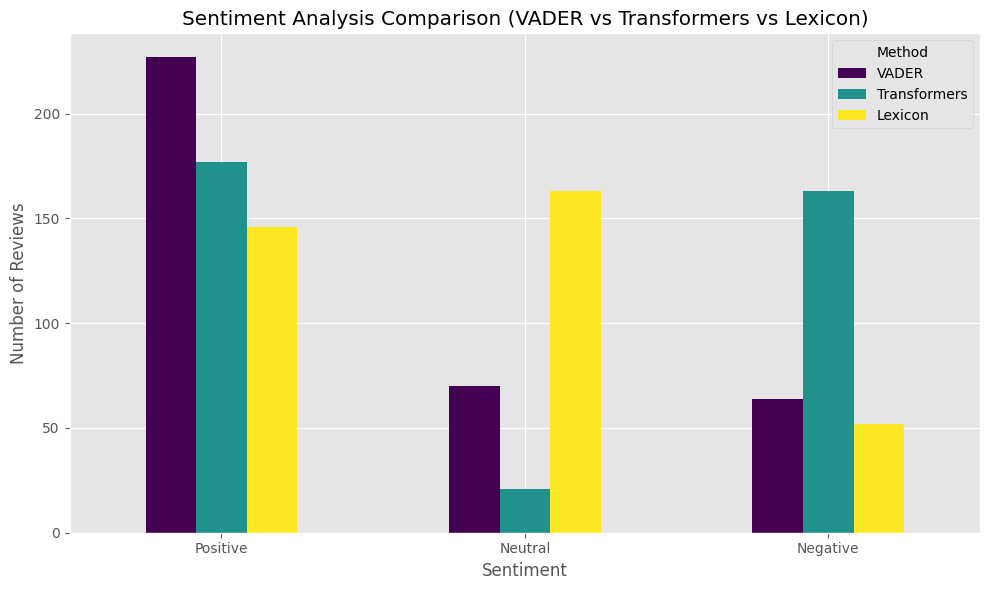

In [ ]:
vader_counts = df['VaderSentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
transformer_counts = df['sentiment_label'].str.capitalize().value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
lexicon_counts = df['lexicon_sentiment'].str.capitalize().value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)


comparison_df = pd.DataFrame({
    'VADER': vader_counts,
    'Transformers': transformer_counts,
    'Lexicon': lexicon_counts
})


comparison_df.plot(kind='bar', figsize=(10, 6), rot=0, colormap='viridis')
plt.title('Sentiment Analysis Comparison (VADER vs Transformers vs Lexicon)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Method')
plt.tight_layout()
plt.show()


In [ ]:
neg_reviews = df[df['sentiment_label'] == 'negative']['Text'].tolist()
pos_reviews = df[df['sentiment_label'] == 'positive']['Text'].tolist()

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

neg_reviews_clean = [clean_text(r) for r in neg_reviews]
pos_reviews_clean = [clean_text(r) for r in pos_reviews]


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def get_top_words(text_list, n=20):
    all_words = ' '.join(text_list).split()

    filtered_words = [w for w in all_words if w not in ENGLISH_STOP_WORDS]
    counter = Counter(filtered_words)
    return counter.most_common(n)

neg_top_words = get_top_words(neg_reviews_clean)
pos_top_words = get_top_words(pos_reviews_clean)
display("Top negative words:", neg_top_words)
display("Top positive words:", pos_top_words)


'Top negative words:'

[('order', 123),
 ('shipping', 92),
 ('dont', 43),
 ('day', 42),
 ('fashion', 41),
 ('nova', 38),
 ('return', 38),
 ('items', 36),
 ('money', 34),
 ('free', 34),
 ('refund', 33),
 ('credit', 33),
 ('ordered', 32),
 ('customer', 29),
 ('card', 28),
 ('pay', 27),
 ('said', 25),
 ('company', 24),
 ('just', 24),
 ('time', 23)]

'Top positive words:'

[('love', 67),
 ('fashion', 52),
 ('nova', 49),
 ('easy', 45),
 ('great', 44),
 ('clothes', 33),
 ('quality', 28),
 ('order', 26),
 ('shopping', 25),
 ('items', 22),
 ('time', 22),
 ('good', 21),
 ('site', 20),
 ('fit', 18),
 ('just', 16),
 ('im', 16),
 ('ive', 14),
 ('prices', 13),
 ('clothing', 13),
 ('website', 12)]

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_ngrams_tfidf(reviews, n=5, ngram_range=(2,2), exclude_terms=None):
    cleaned_reviews = [re.sub(r'[^a-z\s]', '', r.lower()) for r in reviews]

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(cleaned_reviews)
    scores = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    word_score = list(zip(vocab, scores))

    if exclude_terms:
        word_score = [(w, s) for w, s in word_score if all(term not in w for term in exclude_terms)]

    word_score = sorted(word_score, key=lambda x: x[1], reverse=True)
    return word_score[:n]

exclude = ['fashion nova', 'nova', 'fashion', 'day' , 'free' ]

top_neg_phrases = get_top_ngrams_tfidf(neg_reviews, exclude_terms=exclude)
top_pos_phrases = get_top_ngrams_tfidf(pos_reviews, exclude_terms=exclude)

print("people mostly hated:", ', '.join([phrase for phrase, score in top_neg_phrases]))
print("people mostly liked:", ', '.join([phrase for phrase, score in top_pos_phrases]))


people mostly hated: customer service, store credit, gift card, shipping charged, charged shipping
people mostly liked: easy navigate, great service, great quality, quick easy, great experience


In [ ]:
!pip install openai

In [ ]:
import getpass
import pandas as pd



secret_key = getpass.getpass('Please enter your openai key: ')

Please enter your openai key: ··········


In [ ]:
from openai import OpenAI
client = OpenAI(api_key=secret_key)

In [ ]:
from openai import OpenAI
def get_response(example):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "system",
                "content": "you are an expert in marketing and assessing the sentiment of reviews.\n"
                           "im going to give you reviews to assess and you need to mark them as positive, negative or neutral. "
                           "Then, briefly explain your reasoning.\n"
                           "Respond in this format:\n"
                           "Sentiment: <Positive | Negative | Neutral>\n"
                           "Explanation: <Your explanation here>"
            },
            {
                "role": "user",
                "content": "The product arrived on time and works exactly as described. I’m very satisfied."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Positive  \nExplanation: The reviewer expresses satisfaction with the product's functionality and delivery, indicating a positive experience."
            },
            {
                "role": "user",
                "content": "it’s okay. Nothing special, but it does the job."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Neutral  \nExplanation: The reviewer doesn't express strong emotions—positive or negative. They acknowledge that the product works but aren’t impressed."
            },
            {
                "role": "user",
                "content": "Absolutely terrible service. I waited two weeks and the item never came."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Negative  \nExplanation: The reviewer expresses frustration and dissatisfaction due to poor service and not receiving the item."
            },
            {
                "role": "user",
                "content": "The color is nice, but it feels cheap and broke after two uses."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Negative  \nExplanation: Despite a small compliment about the color, the main sentiment is negative due to product quality and durability issues."
            },
            {
                "role": "user",
                "content": "I’ve only used it once so far, but it seems fine."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Neutral  \nExplanation: The reviewer hasn't formed a strong opinion yet. Their tone is reserved and noncommittal."
            },
            {
                "role": "user",
                "content": "This is the best purchase I’ve made all year!"
            },
            {
                "role": "assistant",
                "content": "Sentiment: Positive  \nExplanation: The reviewer uses enthusiastic language and clearly expresses high satisfaction, indicating a very positive sentiment."
            },
            {
                "role": "user",
                "content": "Wow, amazing quality. Broke in less than 24 hours. Totally worth the money."
            },
            {
                "role": "assistant",
                "content": "Sentiment: Negative  \nExplanation: Although the review uses positive words like \"amazing\" and \"totally worth it,\" the sarcasm implies dissatisfaction. The mention of it breaking quickly indicates a clearly negative experience."
            },
            {
                "role": "user",
                "content": f"{example}"
            }
        ],
        temperature=1,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content


In [ ]:
#Test
get_response("""I work for door dash and they locked us all out to wait in a long line for no reason at 10. I tried to beg them to open it because I'm door dash and they refused. Covid is over get a new job""")


"Sentiment: Negative  \nExplanation: The reviewer expresses frustration with the situation, feeling mistreated and inconvenienced by the company. They also express disappointment in the company's handling of the situation, leading to a negative sentiment."

In [ ]:
df = pd.read_csv('/content/reviews.csv')
df['Text'] = df['Text'].str.strip()

In [ ]:
df.head

<bound method NDFrame.head of                                                   Text          Date  Stars
0    My 30% discount code didn’t get applied and I ...   6 hours ago      1
1    Always quick and easy. Wish the styles didn't ...   6 hours ago      5
2    With my original order, I selected the 2-day s...   9 hours ago      1
3    I love this website & app , not only do you gu...  10 hours ago      5
4    Tariffs and duties were really high compared t...  14 hours ago      4
..                                                 ...           ...    ...
356  I'm upset! I received an email from you statin...     10-Apr-25      1
357  Great items and deals first time shopper can't...     10-Apr-25      5
358  I been done put in my birthday and still didn’...     10-Apr-25      1
359  I've been doing 1 day shipping paying the extr...     10-Apr-25      3
360  A lot of the times I wanted were out of stock....     10-Apr-25      3

[361 rows x 3 columns]>

In [ ]:
df2 = df[1:30].copy()

In [ ]:
df2

,Text,Date,Stars
1,Always quick and easy. Wish the styles didn't ...,6 hours ago,5
2,"With my original order, I selected the 2-day s...",9 hours ago,1
3,"I love this website & app , not only do you gu...",10 hours ago,5
4,Tariffs and duties were really high compared t...,14 hours ago,4
5,It wouldn’t take my card,14 hours ago,1
6,"I ordered 8. Of April , the order even not lef...",17 hours ago,1
7,Free 1day shipping was advertised but not avai...,18 hours ago,2
8,I received my package just in time for my vaca...,19 hours ago,5
9,Am here waiting for my delivery which was due ...,19 hours ago,1
10,Fashion Nova never disappoints! Their clothes ...,A day ago,5


In [ ]:
df2['GPT Sentiment'] = df2['Text'].apply(get_response)

In [ ]:
df2

,Text,Date,Stars,GPT Sentiment
1,Always quick and easy. Wish the styles didn't ...,6 hours ago,5,Sentiment: Positive \nExplanation: The review...
2,"With my original order, I selected the 2-day s...",9 hours ago,1,Sentiment: Negative \nExplanation: The review...
3,"I love this website & app , not only do you gu...",10 hours ago,5,Sentiment: Positive \nExplanation: The review...
4,Tariffs and duties were really high compared t...,14 hours ago,4,Sentiment: Negative \nExplanation: The review...
5,It wouldn’t take my card,14 hours ago,1,Sentiment: Negative \nExplanation: The review...
6,"I ordered 8. Of April , the order even not lef...",17 hours ago,1,Sentiment: Negative \nExplanation: The review...
7,Free 1day shipping was advertised but not avai...,18 hours ago,2,Sentiment: Negative \nExplanation: The review...
8,I received my package just in time for my vaca...,19 hours ago,5,Sentiment: Positive \nExplanation: The review...
9,Am here waiting for my delivery which was due ...,19 hours ago,1,Sentiment: Negative \nExplanation: The review...
10,Fashion Nova never disappoints! Their clothes ...,A day ago,5,Sentiment: Positive \nExplanation: The review...


<ipython-input-33-bd2ca5e96781>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


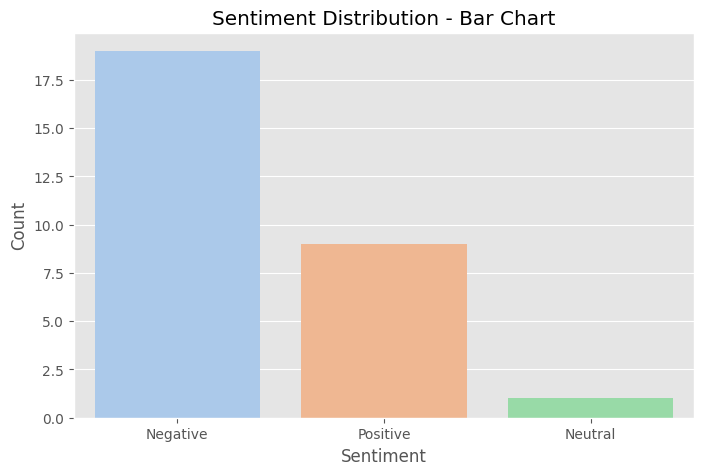

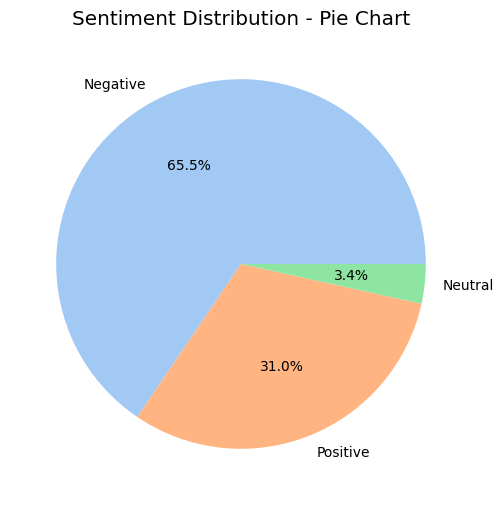

In [ ]:
sentiment_counts = df2['GPT Sentiment'].str.extract(r'Sentiment:\s*(\w+)')[0].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentiment Distribution - Bar Chart')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Distribution - Pie Chart')
plt.show()
